In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:

Base.classes.keys()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
Measurement = Base.classes.measurement
Station = Base.classes.station

# reflect the tables



In [8]:

session = Session(engine)

In [9]:
first_row_station = session.query(Station).first()
first_row_station.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xfd955f8>,
 'longitude': -157.8168,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [10]:
# View all of the classes that automap found
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xfd95460>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
# Save references to each table



In [12]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.

In [27]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

In [28]:
results = pd.DataFrame(results, columns=('date', 'prcp'))
results.set_index('date', inplace=True)
results = results.sort_index(ascending=True)
results

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


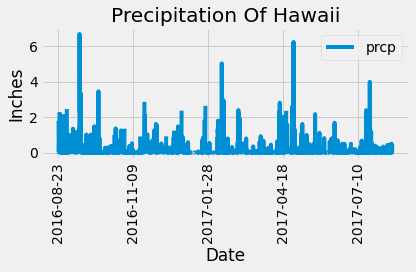

In [31]:
results.plot(rot=90)
plt.ylabel('Inches')
plt.xlabel('Date')

#plt.tick_params(axis='x', which='major', labelsize=5)
plt.title('Precipitation Of Hawaii')
plt.tight_layout()
plt.show()

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation
summary_stas = results.agg({'prcp' : ['mean', 'median', 'std', 'var', 'sem']})
summary_stas

,prcp
mean,0.177279
median,0.020000
std,0.461190
var,0.212696
sem,0.010259


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_results = session.query(Station.station, Station.name, Station.id).order_by(Station.id.desc()).all()
station_results

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 8),
 ('USC00519281', 'WAIHEE 837.5, HI US', 7),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 6),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 5),
 ('USC00517948', 'PEARL CITY, HI US', 4),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 3),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 1)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station).order_by(Measurement.station.desc())
active_station = pd.DataFrame(active_station)
#active_station.count()
active_station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostest_station = 'USC00519281'
for_avgs = session.query(Measurement.tobs, Measurement.station, Measurement.prcp, Measurement.date).filter(Measurement.station == 'USC005161281')
for_avgs = pd.DataFrame(for_avgs, columns=('Temps', 'Station', 'Rainfall','Date'))
for_avgs.set_index('Station', inplace=True)
for_avgs.agg({'Temps' : ['mean', 'min', 'max']})

,Temps
mean,NaN
min,NaN
max,NaN


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
historgramything = session.query(Measurement.station, Measurement.tobs, Measurement.date).filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-23')
historgramything = pd.DataFrame(historgramything, columns=('Station', 'Temps', 'Date'))
historgramything

,Station,Temps,Date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27
...,...,...,...
347,USC00519281,77.0,2017-08-14
348,USC00519281,77.0,2017-08-15
349,USC00519281,76.0,2017-08-16
350,USC00519281,76.0,2017-08-17


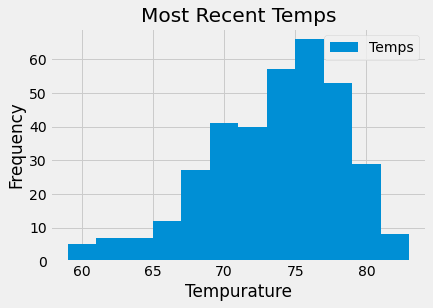

In [23]:
historgramything.plot.hist(bins=12)
plt.title('Most Recent Temps')
plt.xlabel('Tempurature')
plt.ylabel('Frequency')
plt.tight_layout
plt.show()

# Close session

In [24]:
# Close Session
session.close()